In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


# Introduction to scikit - learn

0. an end-to-end Scikit-learn workflow
1. getting the data ready 
2. choose the right estimator/algorithm for our problems
3 . Fit the model and use it for prediction s


## An end-to-end Scikit-Learn workflow



In [5]:
# 1.Get the data Ready 

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# Create X (feature matrix)
X = heart_disease.drop("target" , axis=1)

# Create y (labels)
y = heart_disease["target"]

In [7]:
X , y 

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [8]:
# 2. Choose the right model and hyperparameters 
from sklearn.ensemble import RandomForestClassifier # classification model 
clf = RandomForestClassifier()

# We'll keep the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. Fit the model to training data 
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 )

In [10]:
clf.fit(X_train , y_train);

In [11]:
# Make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [12]:
# Evaluate the model 
clf.score(X_train , y_train)

1.0

In [13]:
clf.score(X_test , y_test)

0.8032786885245902

In [14]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

print (classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        31
           1       0.74      0.93      0.82        30

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [15]:
confusion_matrix(y_test,y_preds)

array([[21, 10],
       [ 2, 28]], dtype=int64)

In [16]:
accuracy_score(y_test , y_preds)

0.8032786885245902

In [17]:
# Improve a model 

np.random.seed(42)
for i in range (10 ,80 , 10):
    print(f"Trying the model with{i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train , y_train)
    print(f"Model accuracy on test set: {clf.score(X_test , y_test) *100:.2f}%"
)

Trying the model with10 estimators...
Model accuracy on test set: 78.69%
Trying the model with20 estimators...
Model accuracy on test set: 73.77%
Trying the model with30 estimators...
Model accuracy on test set: 73.77%
Trying the model with40 estimators...
Model accuracy on test set: 77.05%
Trying the model with50 estimators...
Model accuracy on test set: 78.69%
Trying the model with60 estimators...
Model accuracy on test set: 73.77%
Trying the model with70 estimators...
Model accuracy on test set: 80.33%


In [18]:
# Save a model 
import pickle

pickle.dump ( clf , open("random_forest_model.pkl" , "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_model.pkl",'rb'))
loaded_model.score(X_test , y_test)

0.8032786885245902

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
import sklearn 
sklearn.show_versions()


System:
    python: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\KARAN\example\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.1.2
   setuptools: 67.8.0
        numpy: 1.25.0
        scipy: 1.9.3
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\KARAN\example\env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 14
threading_layer: intel

       filepath: C:\Users\KARAN\example\env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 20


## 1. Getting the data ready 

  Three main things we have to do:
        1. Split the data into features and labels
        2. Filling or disregarding missing values
        3. Converting non numerical values to numeric 

In [22]:
X = heart_disease.drop("target" , axis = 1)
y= heart_disease["target"]

In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [24]:
X.shape


(303, 13)

### 1.1 Make sure its all numerical

In [25]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
car_sales.dtypes

 

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
# Split the data in X and y
X = car_sales.drop("Price" , axis = 1)
y = car_sales["Price"]
 # SPlit the training an dtest set 
X_train , X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2 )


In [28]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test , y_test)

ValueError: could not convert string to float: 'Honda'

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" , "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[["Make" , "Colour" , "Doors"]])

In [32]:
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# Lets refit the model
np.random.seed(42)
X_train , X_test , y_train , y_test = train_test_split(transformed_X ,
                                                       y , 
                                                       test_size = 0.2)
model.fit(X_train , y_train);

In [34]:
model.score(X_test , y_test)

0.3235867221569877

In [35]:
X


,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


### 1.2 What if there were missing vlaues 
 1. Fill them with some value(also known as imputation)
 2. Remove the samples with missing data altogether 

In [36]:
# Import the car sales missing data 
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")

In [37]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
X = car_sales_missing.drop("Price" , axis=1)
y = car_sales_missing["Price"]

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" , "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X;


In [41]:
# Filling out missing data with scikit learn 
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
car_sales_missing.dropna(subset=["Price"] , inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [44]:
# Split into X and y 
X = car_sales_missing.drop("Price" , axis = 1)
y = car_sales_missing["Price"]

In [45]:
# Filling missing values with sci-kit learn
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean 
cat_imputer = SimpleImputer(strategy = "constant" , fill_value = 'missing')
door_imputer = SimpleImputer(strategy = "constant" , fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns
cat_features = ["Make" , "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (ssomething that fills missing data )
imputer = ColumnTransformer ([
    ("cat_imputer" , cat_imputer , cat_features),
    ("door_imputer" , door_imputer , door_features),
    ("num_imputer" , num_imputer , num_features)
])

# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [46]:
car_sales_filled = pd.DataFrame(filled_X , 
                               columns = ["Make" , "Colour" , "Doors" ,"Odometer (KM)"])


In [47]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [48]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:

]

SyntaxError: unmatched ']' (979061554.py, line 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" , "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X;


In [ ]:
# Fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(transformed_X , 
                                                      y , 
                                                      test_size = 0.2)
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train , y_train)
model.score(X_test , y_test)

## 2. Choosing the right estimator/algorithm for your problem


In [ ]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing.keys()

In [ ]:
housing.DESCR

In [ ]:
housing_df = pd.DataFrame(housing["data"] , columns = housing["feature_names"])
housing_df

In [ ]:
housing_df["target"]= housing["target"]
housing_df["MedHouseVal"]= housing["target"]
housing_df.head()

In [ ]:
housing_df = housing_df.drop("MedHouseVal" , axis = 1)

In [ ]:
from sklearn.linear_model import Ridge
np.random.seed(42)

X = housing_df.drop("target" , axis = 1)
y = housing_df["target"]

X_train  , X_test , y_train  , y_test = train_test_split(X , y , test_size = 0.2)

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train , y_train)
model.score(X_test , y_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_test , y_test)
model.score(X_train , y_train)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot" ,
                                   one_hot,
                                  categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(housing_df)
transformed_X;


NameError: name 'housing_df' is not defined

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_test , y_test)
model.score(X_train , y_train)

0.07559533150111952

In [52]:
heart_disease = pd.read_csv("heart-disease.csv")

In [53]:
len(heart_disease)

303

In [54]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

In [56]:
heart_disease.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [57]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X_train , X_test,y_train, y_test = train_test_split(X , y , test_size = 0.2)

In [58]:
clf = LinearSVC()
clf.fit(X_train , y_train)
clf.score(X_test , y_test)

0.8688524590163934

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test , y_test)

0.8524590163934426

## 3. fit the model to the data

In [60]:
y.tail



<bound method NDFrame.tail of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [61]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [62]:
X.tail

<bound method NDFrame.tail of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0 

# 3.2 Make predictions using a ml model
2 ways to make predcitons
1.using 'predict()'
2.predict_proba()

In [63]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
clf.predict(X_test) ==y_test

179     True
228    False
111     True
246     True
60      True
       ...  
249     True
104     True
300     True
193     True
184     True
Name: target, Length: 61, dtype: bool

In [65]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [66]:
clf.score(X_test, y_test)

0.8524590163934426

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_preds)

0.8524590163934426

In [68]:
# Using predict_proba()

# predict_proba() returns probabilities of calssification tabel 
clf.predict_proba(X_test)


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.44, 0.56],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.37, 0.63],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.46, 0.54],
       [0.26, 0.74],
       [0.69, 0.31],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.5 , 0.5 ],
       [0.89, 0.11],
       [0.39, 0.61],
       [0.28, 0.72],
       [0.25, 0.75],
       [0.35, 0.65],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.63, 0.37],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.45, 0.55],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.19, 0.81],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.  ,

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.14754098360655737

## Evaluating a model 

In [70]:
clf.score(X_test , y_test)

0.8524590163934426

In [71]:
housing_df["target"]

NameError: name 'housing_df' is not defined

# Evaluating a machine learning model

In [ ]:
## 1. estimator built in score()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

clf = RandomForestClassifier(n_estimators =500)
clf.fit(X_train , y_train);


In [ ]:
clf.score(X_test , y_test)

In [ ]:
## 2. using score parameters 

In [ ]:
housing_df.head()

In [ ]:
x_pred = clf.fit(X_test , y_test)

In [ ]:
x_pred;

In [ ]:
## 2.Evaluating using the scoring parameter
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

clf = RandomForestClassifier(n_estimators = 200)

clf.fit(X_train , y_train)

In [72]:
cross_val_score(clf , X , y , cv = 7)

NameError: name 'cross_val_score' is not defined

In [ ]:
np.random.seed(42)
#single training and test split score
clf_single_score = clf.score(X_test , y_test)

#Take the mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y , cv = 5))

# Compare the two 
clf_cross_val_score, clf_single_score

In [73]:
np.random.seed(42)
cross_val_score(clf,X,y , cv = 5  , scoring = None)

NameError: name 'cross_val_score' is not defined

### 4.2.1 Classification model evaluation metrics
1. Accuracy 
2. Area Under Roc curve 
3. COnfusion Matrix
4. Classification report

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 500)
cross_val_score = cross_val_score(clf , X , y , cv =7)

In [75]:
np.mean(cross_val_score)

0.8415886439142252

#### Area Under Roc curve ( Reciver operating characterstic curve )

In [76]:
from sklearn.metrics import roc_curve 
clf.fit(X_train , y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)



In [77]:
y_probs

array([[0.912, 0.088],
       [0.448, 0.552],
       [0.484, 0.516],
       [0.868, 0.132],
       [0.166, 0.834],
       [0.162, 0.838],
       [0.256, 0.744],
       [0.954, 0.046],
       [0.972, 0.028],
       [0.526, 0.474],
       [0.252, 0.748],
       [0.714, 0.286],
       [0.078, 0.922],
       [0.836, 0.164],
       [0.048, 0.952],
       [0.012, 0.988],
       [0.01 , 0.99 ],
       [0.88 , 0.12 ],
       [0.946, 0.054],
       [0.948, 0.052],
       [0.5  , 0.5  ],
       [0.916, 0.084],
       [0.368, 0.632],
       [0.236, 0.764],
       [0.306, 0.694],
       [0.308, 0.692],
       [0.254, 0.746],
       [0.258, 0.742],
       [0.868, 0.132],
       [0.118, 0.882],
       [0.906, 0.094],
       [0.918, 0.082],
       [0.982, 0.018],
       [0.65 , 0.35 ],
       [0.406, 0.594],
       [0.884, 0.116],
       [0.406, 0.594],
       [0.236, 0.764],
       [0.4  , 0.6  ],
       [0.14 , 0.86 ],
       [0.158, 0.842],
       [0.24 , 0.76 ],
       [0.146, 0.854],
       [0.3

In [78]:
y_probs_positive = y_probs[: , 1]
y_probs_positive

array([0.088, 0.552, 0.516, 0.132, 0.834, 0.838, 0.744, 0.046, 0.028,
       0.474, 0.748, 0.286, 0.922, 0.164, 0.952, 0.988, 0.99 , 0.12 ,
       0.054, 0.052, 0.5  , 0.084, 0.632, 0.764, 0.694, 0.692, 0.746,
       0.742, 0.132, 0.882, 0.094, 0.082, 0.018, 0.35 , 0.594, 0.116,
       0.594, 0.764, 0.6  , 0.86 , 0.842, 0.76 , 0.854, 0.69 , 0.744,
       0.264, 0.584, 0.99 , 0.146, 0.058, 0.194, 0.21 , 0.788, 0.746,
       0.156, 0.112, 0.394, 0.964, 0.16 , 0.004, 0.17 ])

In [79]:
fpr , tpr , thresholds = roc_curve ( y_test , y_probs_positive)

In [80]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.10344828, 0.17241379, 0.17241379,
       0.20689655, 0.20689655, 0.48275862, 0.55172414, 0.65517241,
       0.65517241, 1.        ])

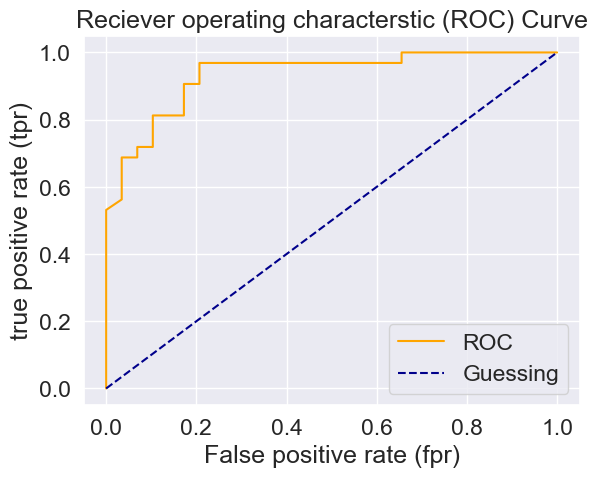

In [81]:
import matplotlib.pyplot as plt 

def plot_roc_curve(fpr , tpr):
    """
    Plots a RoC curve given the false positive rate and true positive rate of a model
    
    """
    # Plot roc curve
    plt.plot(fpr , tpr , color = "orange" , label = "ROC")
    # Plot linr eith no predictive power(baseline)
    plt.plot([0,1] , [0,1] , color = "darkblue" , linestyle = "--" , label = "Guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Reciever operating characterstic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr , tpr)

In [82]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test , y_probs_positive)

0.9337284482758621

In [83]:
fpr , tpr , thresholds = roc_curve(y_test , y_test)

### COnfusion Matrix

A quick way to compare the labels a model predicts and the actual labels it was supposed to  predict

In [84]:
from sklearn.metrics import confusion_matrix 

y_preds = clf.predict(X_test)

confusion_matrix(y_test , y_preds)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [85]:
# using seaborn heatmap
import sys  
!conda install --yes --prefix {sys.prefix} seaborn


Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4




In [86]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


<Axes: >

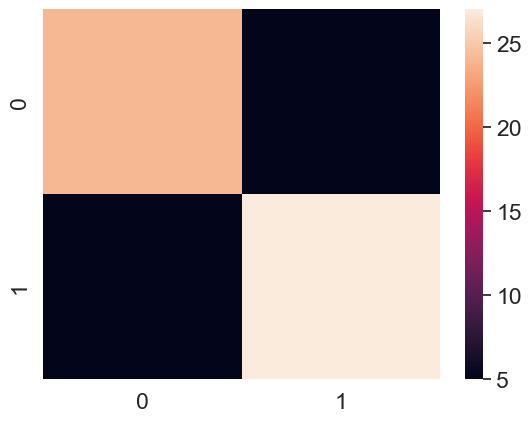

In [87]:
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test , y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

In [88]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\anaconda3

  added / updated specs:
    - conda


The following NEW packages will be INSTALLED:

  krb5               pkgs/main/win-64::krb5-1.20.1-h5b6d351_1 
  libclang13         pkgs/main/win-64::libclang13-14.0.6-default_h8e68704_1 
  libpq              pkgs/main/win-64::libpq-12.15-hb652d5d_1 

The following packages will be REMOVED:

  alabaster-0.7.12-pyhd3eb1b0_0
  anyio-3.5.0-py310haa95532_0
  appdirs-1.4.4-pyhd3eb1b0_0
  argon2-cffi-21.3.0-pyhd3eb1b0_0
  argon2-cffi-bindings-21.2.0-py310h2bbff1b_0
  arrow-1.2.3-py310haa95532_1
  astroid-2.14.2-py310haa95532_0
  astropy-5.1-py310h9128911_0
  asttokens-2.0.5-pyhd3eb1b0_0
  atomicwrites-1.4.0-py_0
  automat-20.2.0-py_0
  autopep8-1.6.0-pyhd3eb1b0_1
  babel-2.11.0-py310haa95532_0
  backcall-0.2.0-pyhd3eb1b0_0
  bcrypt-3.2.0-py310h2bbff1b_1
  binaryornot-0.4.4-pyhd3eb1b0_1
  black-22.6.0-py310haa95532_0
  blas-1.0-mkl
  bleach-4.1.0

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\ProgramData\anaconda3\.condatmp\ed8306f3-0bea-459f-b49c-9b1903ebd3d3.  Please remove this file manually (you may need to reboot to free file handles)

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\anaconda3


